In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import random
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['names']


In [2]:
from nltk.corpus import names

In [3]:
overall_name = ([(name, 'male') for name in names.words('male.txt')] +
[(name, 'female') for name in names.words('female.txt')])

In [4]:
male_names = []
male_names = ([(name) for name in names.words('male.txt')])

In [5]:
female_names = []
female_names = ([(name) for name in names.words('female.txt')])

In [6]:
def word_freq(list_name,k):
    alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    alphabet_freq_first = [0]*26;
    alphabet_freq_last = [0]*26;
    for name in list_name:
        first_letter = name[0].lower();
        last_letter = name[-1].lower();
        i = 0;
        
        for letter in 'abcdefghijklmnopqrstuvwxyz':
            if first_letter == letter:
                alphabet_freq_first[i] = alphabet_freq_first[i]+1;
                
            if last_letter == letter:
                alphabet_freq_last[i] = alphabet_freq_last[i]+1;
            i = i+1
    plt.plot(alphabet, alphabet_freq_first)
    plt.xlabel('alphabet')
    plt.ylabel('frequency')
    plt.title('Frequency of alphabet in the first letter of all the ' + k)
    plt.show()
    plt.plot(alphabet, alphabet_freq_last)
    plt.xlabel('alphabet')
    plt.ylabel('frequency')
    plt.title('Frequency of alphabet in the last letter of all the ' + k)
    plt.show()
    return alphabet_freq_first, alphabet_freq_last
    
            

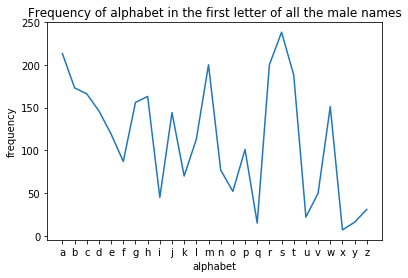

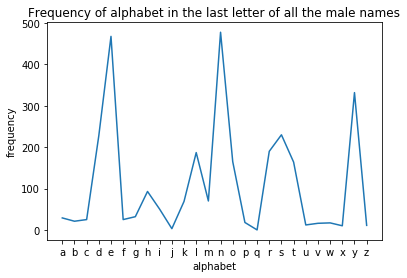

In [7]:
(first,last) = word_freq(male_names,'male names')

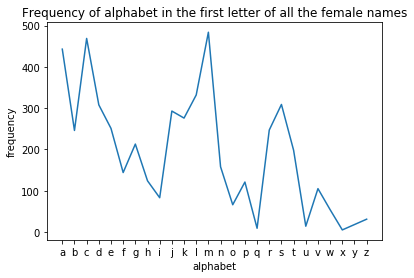

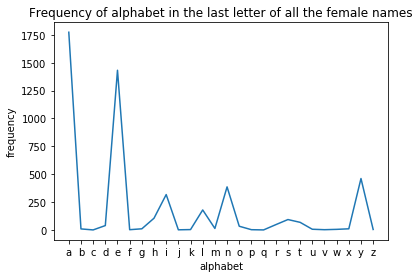

In [8]:
(first,last) = word_freq(female_names,'female names')

In [9]:
def whole_name_freq(list_name):
    overall = [];
    overall_dicti = [];
    dicti = {}
    for name in list_name:
        alp = [0]*26;
        for letter in 'abcdefghijklmnopqrstuvwxyz':
            dicti[letter] = 0
            #print(dicti)
        for i in range(len(name)):
            s = 0;

            for letter in 'abcdefghijklmnopqrstuvwxyz':
                if name[i].lower() == letter:
                    alp[s] = alp[s]+1;
                    #print(dicti)
                    #print(name[i])
                    
                    dicti[letter] = dicti[letter] + 1;
                    #print(dicti[letter])
                s = s+1;
        
        #print(dicti)
        overall_dicti.append(dicti)
        overall.append(alp)   
    return overall,overall_dicti
    

In [10]:
def plo_specific_name(num,overall,name_list):
    alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    print(name_list[num])
    print(alphabet)
    print(overall[num])
    plt.plot(alphabet, overall[num])
    plt.xlabel('alphabet')
    plt.ylabel('frequency')
    plt.title('frequency of all words in the name '+name_list[num])
    

In [11]:
overall_female,overall_female_dicti = whole_name_freq(female_names)

Abagail
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[3, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


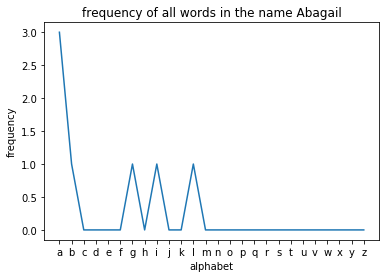

In [12]:
plo_specific_name(1,overall_female,female_names)

In [13]:
overall_male,overall_male_dicti = whole_name_freq(male_names)

Aamir
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


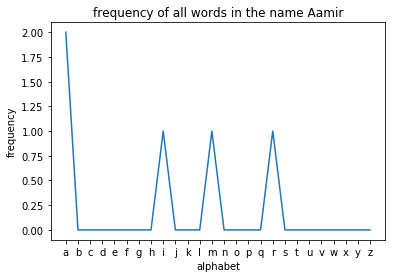

In [14]:
plo_specific_name(0,overall_male,male_names)

In [15]:
female_names[0]

'Abagael'

In [16]:
### Classification
overall_female[0]

[3, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [17]:
overall_male[0]

[2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [18]:
overall_male_dicti_with_label = ([(name, 'male') for name in overall_male_dicti])
overall_female_dicti_with_label = ([(name, 'female') for name in overall_female_dicti])
overall_dicti_with_label = overall_male_dicti_with_label + overall_female_dicti_with_label

In [19]:
overall_male_with_label = ([(name, 'male') for name in overall_male])
overall_female_with_label = ([(name, 'female') for name in overall_female])
overall_with_label = overall_male_with_label + overall_female_with_label

In [20]:
random.shuffle(overall_dicti_with_label)

In [21]:
train_names = overall_dicti_with_label[:5000]

In [22]:
test_names = overall_dicti_with_label[5001:]

In [23]:
import nltk
classifier = nltk.NaiveBayesClassifier.train(train_names)

In [24]:
print(nltk.classify.accuracy(classifier, test_names))

1.0
